#### This simple tutorial is aimed to demostrate the idea of applying the Gradient Descent algorithm to solve Polynomial Curve Fitting problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In general, a $N^{th}$ degree polynomial function has the form
$$f_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4... = \sum_{i=0}^N \theta_ix^i  \label{eq1} \tag{1}$$ 

In [ ]:
'''
Compute the value of a Nth-degree polynomial function
    theta: The parameters, length N
'''
def polynomial(theta, x):
    t_x = map(lambda i: np.power(x,i), range(len(theta)))
    return np.dot(theta.T, t_x)[0]

## 1. Play with the data

##### For a given $4^{th}$ degree function $f(x)=4x^4+2x^3-5x^2+x-3$,   
$f(x_0=2)=59$

In [ ]:
theta = np.flip(np.array([4, 2, -5, 1, -3]), axis = 0).reshape((-1,1))
print("f(x=2)= %.4f" % polynomial(theta, 2)) # Alert 

f(x=2)= 59.0000


#### Consider a synthesized dataset, which is generated from a $3^{rd}$ degree polynomial function $f(x)=x^3+2x^2-4x+5$

In [ ]:
np.random.seed(0)
X = np.linspace(-3.5, 3.5, 100)
print(X)
#theta = np.flip(np.array([1, 2, -4, 5]), axis = 0).reshape((-1,1))
theta = np.flip(np.array([5, 3, 0, 2]), axis = 0).reshape((-1,1))
Y = map(lambda x: polynomial(theta, x), X)
print(Y)
#We add a Gaussian noise N(0,2) to each Y[i]
noise = np.random.normal(0, 2, len(Y))
Y_noise = Y+10*noise

[-3.5        -3.42929293 -3.35858586 -3.28787879 -3.21717172 -3.14646465
 -3.07575758 -3.00505051 -2.93434343 -2.86363636 -2.79292929 -2.72222222
 -2.65151515 -2.58080808 -2.51010101 -2.43939394 -2.36868687 -2.2979798
 -2.22727273 -2.15656566 -2.08585859 -2.01515152 -1.94444444 -1.87373737
 -1.8030303  -1.73232323 -1.66161616 -1.59090909 -1.52020202 -1.44949495
 -1.37878788 -1.30808081 -1.23737374 -1.16666667 -1.0959596  -1.02525253
 -0.95454545 -0.88383838 -0.81313131 -0.74242424 -0.67171717 -0.6010101
 -0.53030303 -0.45959596 -0.38888889 -0.31818182 -0.24747475 -0.17676768
 -0.10606061 -0.03535354  0.03535354  0.10606061  0.17676768  0.24747475
  0.31818182  0.38888889  0.45959596  0.53030303  0.6010101   0.67171717
  0.74242424  0.81313131  0.88383838  0.95454545  1.02525253  1.0959596
  1.16666667  1.23737374  1.30808081  1.37878788  1.44949495  1.52020202
  1.59090909  1.66161616  1.73232323  1.8030303   1.87373737  1.94444444
  2.01515152  2.08585859  2.15656566  2.22727273  2.29

In [ ]:
print("X.shape: " + str(X.shape))
print("X[0-9]: " + str(X[0:10]))

X.shape: (100,)
X[0-9]: [-3.5        -3.42929293 -3.35858586 -3.28787879 -3.21717172 -3.14646465
 -3.07575758 -3.00505051 -2.93434343 -2.86363636]


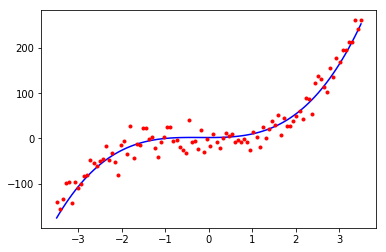

In [ ]:
plt.close()
plt.plot(X,Y, 'b', X, Y_noise, 'r.')
plt.show()

## 2. Gradient Descent

In this part, you will fit the polynomial parameters $\theta$ to our dataset using gradient descent. <br/>
From the above figure, it's reasonable to suppose our dataset is generated from a $3^{rd}$ degree polynomial function, i.e our hypothesis function is
$$h_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3  \label{eq2} \tag{2}$$

### 2.1 The cost function

#### The objective of the polynomial regression is to minimize the Mean of Square Error (MSE) function:
$$L(x, y,\theta)=\frac{1}{2M}\sum_{i=1}^M{[h_\theta(x^{(i)})-y^{(i)}]}^2=\frac{1}{2M}\sum_{i=1}^M{[\theta_0+\theta_1x^{(i)}+\theta_2{x^{(i)}}^2+\theta_3{x^{(i)}}^3-y^{(i)}]}^2 \label{eq3} \tag{3}$$
where M is the number of training samples, and $x^{(i)}$ is the $i^{th}$ sample in the dataset

In [ ]:

'''
ComputeCost Compute cost for linear regression
   L = ComputeCost(X, y, theta) computes the cost of using theta as the
   parameter for polynomial regression to fit the data points in X and y
'''
def ComputeCost(X, y, theta):
    M = len(X)
    #print(M)
    L = 0
    for i in range(M):     
        L += (polynomial(theta,X[i]) - y[i]) ** 2 # correct 
        #print(np.dot((polynomial(theta, X) - y).T, (polynomial(theta, X) - y)), (polynomial(theta, X[i])-y[i])**2)
    #L = np.dot((polynomial(theta, X) - y).T, (polynomial(theta, X) - y)) # Alert     
    #print(L)    
    L = np.divide(L, 2*M)
    return L

In [ ]:
# Draft 
def h(theta,X):
    return np.dot(X,theta)

def computeCost(mytheta,X,y):
    return float((1/2*m) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

In [ ]:
theta_zero = np.array([0, 0, 0, 0]).reshape((-1,1))
#print(theta_zero)
cost = ComputeCost(X, Y_noise, theta_zero)
#print(cost)
print('Cost at parameters thetaZero (0,0,0,0): %f \n(this value should be about 172.8149)' %cost)

Cost at parameters thetaZero (0,0,0,0): 172.814955 
(this value should be about 172.8149)


In [ ]:
from numpy import *
a = arange(4).reshape((2,2))
print a
a_T = a.T 
print(a_T)
L = 0
for i in range(len(a)):
    print(a[i]**2)
    L += (a[i]) ** 2
print(L)
b = np.dot(a_T, a)
print(b)

[[0 1]
 [2 3]]
[[0 2]
 [1 3]]
[0 1]
[4 9]
[ 4 10]
[[ 4  6]
 [ 6 10]]


In [ ]:
theta_zero = np.array([0, 0, 0, 0]).reshape((-1,1))
cost = ComputeCost(X, Y_noise, theta_zero)
print('Cost at parameters thetaZero (0,0,0,0): %f \n(this value should be about 172.8149)' %cost)

Cost at parameters thetaZero (0,0,0,0): 172.814955 
(this value should be about 172.8149)


### 2.2 The Update Equation


Pseudo Code for the Algorithm of the Gradient Descent:<br>
Initialize $\theta$ <br>
For k=1...N_iteration <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Update:&nbsp;&nbsp;</strong>$\theta = \theta -\alpha \frac {\partial{L(x,y,\theta)}}{\partial{\theta}}$

In Polynomial curver fitting problem $\frac {\partial{L(x,y,\theta)}}{\partial{\theta_j}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]{x^{(i)}}^j$.<br> For an example:
$\frac {\partial{L(x,y,\theta)}}{\partial{\theta_0}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]$,
$\frac {\partial{L(x,y,\theta)}}{\partial{\theta_2}}=\frac{1}{M}\sum_{i=1}^M[h_\theta(x^{(i)})-y^{(i)}]{x^{(i)}}^2$

In [ ]:
'''
    curve_fit: fit the polinomial function from the data X, Y and an initialized theta
    using Gradient Descent algorithm
'''
def curve_fit(X, Y, theta, alpha =0.001, n_iter = 100, display_step = 50, verbose = True):
    #for each interation, compute the gradient and make an update: theta = theta - alpha*dL
    for k in range(n_iter):
        if verbose and (k+1) % display_step ==0:
            L=ComputeCost(X, Y, theta)
            print("K=%d L=%.6f" %(k+1, L), theta) 
        dL = np.zeros(theta.shape)
        L = 0
        for i in range(len(X)):
            #compute the residual h(x)-y
            res = (polynomial(theta,X[i]) - Y[i]) # !!!
            #print(res)

            #compute the derivative of theta
            dTheta = np.zeros(theta.shape)
            #print(dTheta)
            for j in range(len(theta)):
                #compute the value dTheta_j = [h(x)-y]x^j
                #print(X[i])
                #print(X[i]**j)
                #print(j)
                dTheta[j] = (res * (X[i]**j)) # !!! polynomial(theta,X[j]) - Y[j])
                #print(dTheta[j])
            dL = np.add(dL, dTheta)
        dL = np.divide(dL, len(X))
        theta = theta - np.multiply(dL, alpha) 
    return theta

In [ ]:
#initialize theta_zero
theta_zero = np.zeros(theta.shape)
theta_zero = curve_fit(X, Y_noise, theta_zero, 0.001, display_step=100, n_iter=2000)

('K=100 L=10.048743', array([[ 0.51849576],
       [-0.203051  ],
       [ 2.60104638],
       [ 0.5645729 ]]))
('K=200 L=8.964726', array([[ 0.69128082],
       [-0.45200785],
       [ 2.68681282],
       [ 0.59253513]]))
('K=300 L=8.180384', array([[ 0.84337887],
       [-0.68511059],
       [ 2.67055031],
       [ 0.61871666]]))
('K=400 L=7.483754', array([[ 0.98845369],
       [-0.90336884],
       [ 2.65109659],
       [ 0.64323089]]))
('K=500 L=6.864521', array([[ 1.12731018],
       [-1.10772792],
       [ 2.63232041],
       [ 0.66618401]]))
('K=600 L=6.313851', array([[ 1.26023395],
       [-1.29907297],
       [ 2.61434028],
       [ 0.68767542]]))
('K=700 L=5.823943', array([[ 1.38747922],
       [-1.47823275],
       [ 2.59712801],
       [ 0.70779821]]))
('K=800 L=5.387901', array([[ 1.50928861],
       [-1.64598324],
       [ 2.58065104],
       [ 0.72663954]]))
('K=900 L=4.999629', array([[ 1.62589434],
       [-1.80305101],
       [ 2.56487796],
       [ 0.74428101]]))


In [ ]:
#initialize theta_zero
theta_zero = np.zeros(theta.shape)
theta_zero = curve_fit(X, Y_noise, theta_zero, 0.001, display_step=100, n_iter=2000)

('K=100 L=10.048743', array([[ 0.51849576],
       [-0.203051  ],
       [ 2.60104638],
       [ 0.5645729 ]]))
('K=200 L=8.964726', array([[ 0.69128082],
       [-0.45200785],
       [ 2.68681282],
       [ 0.59253513]]))
('K=300 L=8.180384', array([[ 0.84337887],
       [-0.68511059],
       [ 2.67055031],
       [ 0.61871666]]))
('K=400 L=7.483754', array([[ 0.98845369],
       [-0.90336884],
       [ 2.65109659],
       [ 0.64323089]]))
('K=500 L=6.864521', array([[ 1.12731018],
       [-1.10772792],
       [ 2.63232041],
       [ 0.66618401]]))
('K=600 L=6.313851', array([[ 1.26023395],
       [-1.29907297],
       [ 2.61434028],
       [ 0.68767542]]))
('K=700 L=5.823943', array([[ 1.38747922],
       [-1.47823275],
       [ 2.59712801],
       [ 0.70779821]]))
('K=800 L=5.387901', array([[ 1.50928861],
       [-1.64598324],
       [ 2.58065104],
       [ 0.72663954]]))
('K=900 L=4.999629', array([[ 1.62589434],
       [-1.80305101],
       [ 2.56487796],
       [ 0.74428101]]))


In [ ]:
print("theta_zero", theta_zero)
print('You should expect to see the value of theta [[2.623],[-2.993],[2.4299],[0.87797]]')

('theta_zero', array([[ 2.6231023 ],
       [-2.99333081],
       [ 2.42998715],
       [ 0.87797034]]))
You should expect to see the value of theta [[2.623],[-2.993],[2.4299],[0.87797]]


### 2.3 Visualize the fitted curve

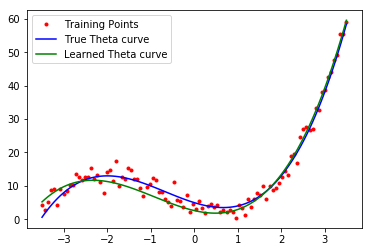

In [ ]:
Y_pred = map(lambda x: polynomial(theta_zero, x), X)
plt.close()
plt.plot(X, Y_noise, 'r.', label='Training Points')
plt.plot(X,Y, 'b', label = 'True Theta curve')
plt.plot( X, Y_pred, 'g', label = 'Learned Theta curve')
plt.legend( loc='upper left', borderaxespad=0.5)
plt.show()